# Project description

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value.
Rusty Bargain is interested in:

* the quality of the prediction
* the speed of the prediction
* the time required for training

## Data description

### Features

    DateCrawled — date profile was downloaded from the database
    VehicleType — vehicle body type
    RegistrationYear — vehicle registration year
    Gearbox — gearbox type
    Power — power (hp)
    Model — vehicle model
    Mileage — mileage (measured in km due to dataset's regional specifics)
    RegistrationMonth — vehicle registration month
    FuelType — fuel type
    Brand — vehicle brand
    NotRepaired — vehicle repaired or not
    DateCreated — date of profile creation
    NumberOfPictures — number of vehicle pictures
    PostalCode — postal code of profile owner (user)
    LastSeen — date of the last activity of the user

### Target
    Price — price (Euro)


In [1]:
!pip install -U pandas
!pip install -U numpy
!pip install -U seaborn
!pip install -U matplotlib
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.4)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: numpy in /home/jovyan/.local/lib/python3.7/site-packages (1.21.4)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: matplotlib in /home/jovyan/.local/lib/python3.7/site-packages (3.4.3)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0.1)


In [2]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [3]:
# import warnings
# warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

## Data preparation

In [4]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/car_data.csv")
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df['DateCreated'] = pd.to_datetime(df['DateCreated'])
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'])
df['LastSeen'] = pd.to_datetime(df['LastSeen'])

In [7]:
df.columns = df.columns.to_series().apply(lambda x: x.lower())

In [8]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354369 non-null  datetime64[ns]
 1   price              354369 non-null  int64         
 2   vehicletype        316879 non-null  object        
 3   registrationyear   354369 non-null  int64         
 4   gearbox            334536 non-null  object        
 5   power              354369 non-null  int64         
 6   model              334664 non-null  object        
 7   mileage            354369 non-null  int64         
 8   registrationmonth  354369 non-null  int64         
 9   fueltype           321474 non-null  object        
 10  brand              354369 non-null  object        
 11  notrepaired        283215 non-null  object        
 12  datecreated        354369 non-null  datetime64[ns]
 13  numberofpictures   354369 non-null  int64   

## EDA

* check nulls:

In [10]:
x = df.isna().sum()
pd.DataFrame(x[x != 0]).transpose()

,vehicletype,gearbox,model,fueltype,notrepaired
0,37490,19833,19705,32895,71154


In [11]:
df.describe(datetime_is_numeric=True).loc[['min', 'max', 'mean'], :]

,datecrawled,price,registrationyear,power,mileage,registrationmonth,datecreated,numberofpictures,postalcode,lastseen
min,2016-01-04 00:06:00,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-10-03 00:00:00,0.0,1067.000000,2016-01-04 00:15:00
max,2016-12-03 23:59:00,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-12-03 00:00:00,0.0,99998.000000,2016-12-03 23:54:00
mean,2016-04-27 09:10:19.547421184,4416.656776,2004.234448,110.094337,128211.172535,5.714645,2016-04-26 10:09:30.097271552,0.0,50508.689087,2016-05-08 02:24:54.781033216


* all these "dates" columns and the postal code are about the user profile and not about the car , so they are meaningless for us.
* number of pictures is 0 always.
* i dont think we need the 'registration month' to do our predictions.

In [12]:
df.drop(columns=['numberofpictures', 'postalcode', 'lastseen',
        'datecreated', 'registrationmonth', 'datecrawled', ], inplace=True)

In [13]:
df['vehicletype'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicletype, dtype: int64

* this "other" is like nulls for us, so we will replace it with nulls all over the table.

In [14]:
df = df.applymap(lambda s: np.nan if s == 'other' else s)

In [15]:
x = df.isna().sum()
pd.DataFrame(x[x != 0]).transpose()

,vehicletype,gearbox,model,fueltype,notrepaired
0,40778,19833,44126,33099,71154


* we have now more nulls

In [17]:
df['gearbox'].value_counts()

manual    268251
auto       66285
Name: gearbox, dtype: int64

In [18]:
df['power'].value_counts()

0       40225
75      24023
60      15897
150     14590
101     13298
        ...  
610         1
6006        1
5815        1
6018        1
1241        1
Name: power, Length: 712, dtype: int64

* i dont know about a vehicle with more than 800 ph. so we will remove these outliers:

In [19]:
df = df[df['power'] < 800]

In [20]:
df['model'].value_counts()

golf                  29212
3er                   19745
polo                  13054
corsa                 12558
astra                 10796
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 249, dtype: int64

In [21]:
df['fueltype'].value_counts()

petrol      216165
gasoline     98644
lpg           5306
cng            563
hybrid         233
electric        90
Name: fueltype, dtype: int64

In [22]:
df['brand'].value_counts()

volkswagen       76939
opel             39879
bmw              36881
mercedes_benz    32017
audi             29433
                 ...  
saab               526
jaguar             505
rover              486
lancia             469
lada               225
Name: brand, Length: 40, dtype: int64

In [23]:
df['notrepaired'].value_counts()

no     246989
yes     36007
Name: notrepaired, dtype: int64

* how much data we will lose if we remove the nulls ?

In [24]:
df.shape ,df.dropna().shape

((354028, 10), (225831, 10))

* it's a lot of values, but we have a queit big data set. so i will drop them.

In [25]:
df = df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225831 entries, 3 to 354367
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             225831 non-null  int64 
 1   vehicletype       225831 non-null  object
 2   registrationyear  225831 non-null  int64 
 3   gearbox           225831 non-null  object
 4   power             225831 non-null  int64 
 5   model             225831 non-null  object
 6   mileage           225831 non-null  int64 
 7   fueltype          225831 non-null  object
 8   brand             225831 non-null  object
 9   notrepaired       225831 non-null  object
dtypes: int64(4), object(6)
memory usage: 19.0+ MB


* lets check the distributions:

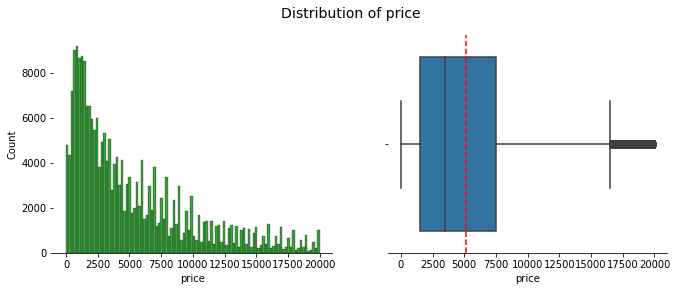

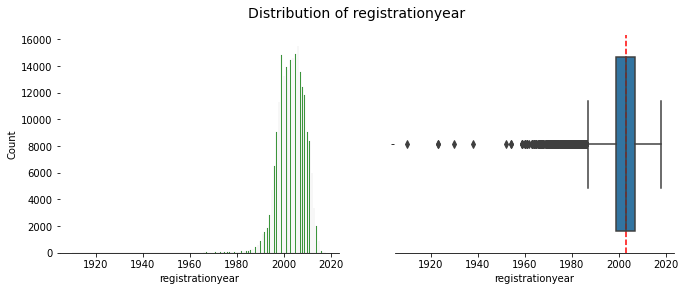

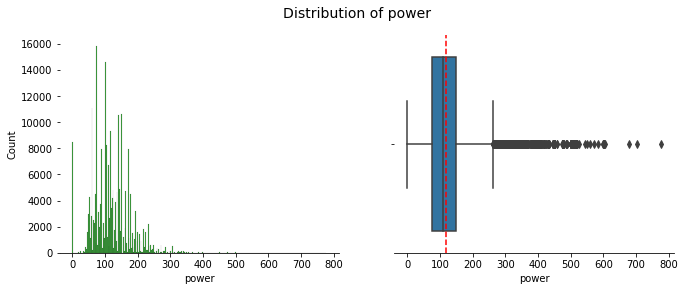

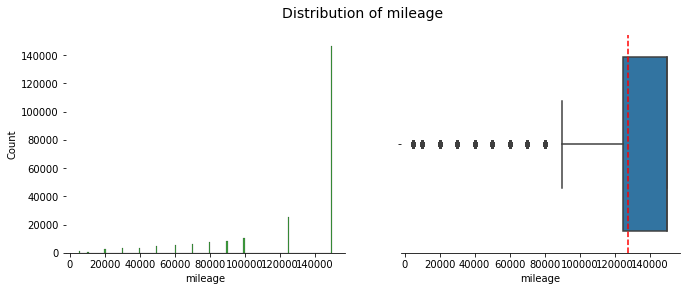

In [27]:
for col in ['price', 'registrationyear', 'power', 'mileage']:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
    fig.suptitle(f"Distribution of {col}", fontsize=14)
    sns.histplot(data=df, x=col, ax=axes[0], color="green")
    axes[1].axvline(df[col].mean(), color='red', linestyle="--")
    sns.boxplot(data=df, x=col, ax=axes[1])
    sns.despine(left=True)

* we will remove vehicles with power 0
* we will remove vehicles with price 0
* we will remove vehicles from before 1960

In [28]:
df = df[df['power'] > 0]

df = df[df['price'] > 0]

df = df[df['registrationyear'] > 1960]

In [29]:
df.describe(datetime_is_numeric=True).loc[['min', 'max', 'mean'], :]

,price,registrationyear,power,mileage
min,1.000000,1961.000000,1.000000,5000.000000
max,20000.000000,2018.000000,776.000000,150000.000000
mean,5314.829516,2003.380156,122.432343,127264.099101


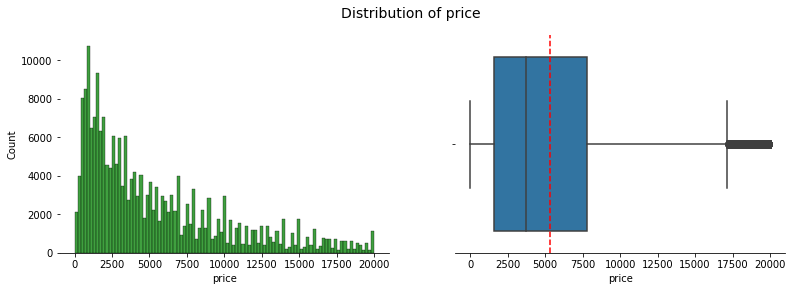

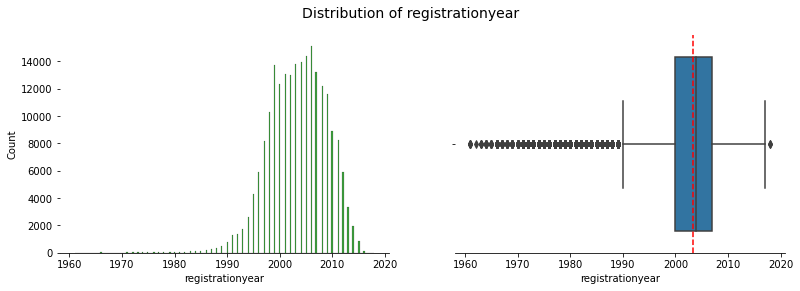

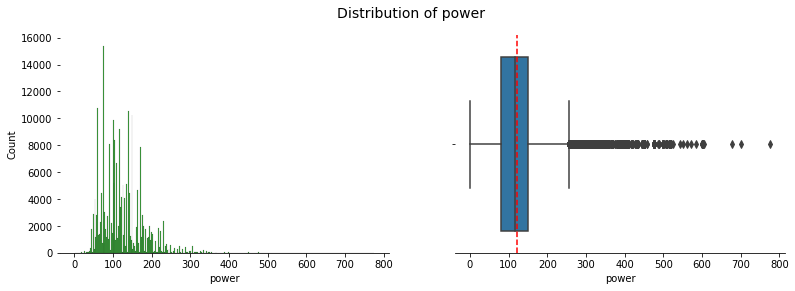

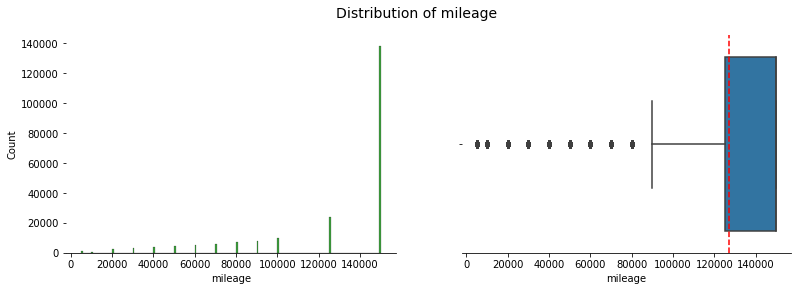

In [30]:
for col in ['price', 'registrationyear', 'power', 'mileage']:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
    fig.suptitle(f"Distribution of {col}", fontsize=14)
    sns.histplot(data=df, x=col, ax=axes[0], color="green")
    axes[1].axvline(df[col].mean(), color='red', linestyle="--")
    sns.boxplot(data=df, x=col, ax=axes[1])
    sns.despine(left=True)

In [31]:
df.shape

(214730, 10)

## ML

first, what we could to turn to numerical values, we would do:

In [33]:
df['notrepaired'] = df['notrepaired'].map({'no': 0, "yes": 1})

In [34]:
df['gearbox'].value_counts()

manual    170191
auto       44539
Name: gearbox, dtype: int64

In [35]:
df['gearbox'] = df['gearbox'].map({'manual': 0, "auto": 1})

In [36]:
df = df.rename(columns={"gearbox": "autogear"})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214730 entries, 3 to 354367
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             214730 non-null  int64 
 1   vehicletype       214730 non-null  object
 2   registrationyear  214730 non-null  int64 
 3   autogear          214730 non-null  int64 
 4   power             214730 non-null  int64 
 5   model             214730 non-null  object
 6   mileage           214730 non-null  int64 
 7   fueltype          214730 non-null  object
 8   brand             214730 non-null  object
 9   notrepaired       214730 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 26.1+ MB


In [38]:
df.head()

,price,vehicletype,registrationyear,autogear,power,model,mileage,fueltype,brand,notrepaired
3,1500,small,2001,0,75,golf,150000,petrol,volkswagen,0
4,3600,small,2008,0,69,fabia,90000,gasoline,skoda,0
5,650,sedan,1995,0,102,3er,150000,petrol,bmw,1
6,2200,convertible,2004,0,109,2_reihe,150000,petrol,peugeot,0
10,2000,sedan,2004,0,105,3_reihe,150000,petrol,mazda,0


## Sanity check - Linear regression

* we have some categorical columns with too many variables to do "one hot encoding" - like the "model" column. 
* we use the linear regression just for sanity check.
* so we will drop these columns.

In [39]:
y = df["price"]
X = pd.get_dummies(df.drop(columns=['price', 'model']), drop_first=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [42]:
%%time
model = LinearRegression()
model.fit(X_train_scaled, y_train)

CPU times: user 1.21 s, sys: 353 ms, total: 1.57 s
Wall time: 1.56 s


LinearRegression()

In [44]:
%%time
preds = model.predict(X_test_scaled)

CPU times: user 353 µs, sys: 15 ms, total: 15.3 ms
Wall time: 5.44 ms


In [45]:
RMSE = mean_squared_error(y_test, preds)**0.5
print(f"RMSE: {round(RMSE,2)}")

RMSE: 2550.6


In [46]:
print(f"Mean price: {round(df['price'].mean(),1)}")

Mean price: 5314.8


* as expected, this isn't a good model, the error is about 50% of the mean, but it's our sanity check.

## Gradient Boosting

we will use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor">HistGradientBoostingRegressor</a> from sklearn, which inspired by LightGBM.

In [49]:
df['vehicletype'] = df['vehicletype'].astype("category")
df['model'] = df['model'].astype("category")
df['brand'] = df['brand'].astype("category")
df['fueltype'] = df['fueltype'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214730 entries, 3 to 354367
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   price             214730 non-null  int64   
 1   vehicletype       214730 non-null  category
 2   registrationyear  214730 non-null  int64   
 3   autogear          214730 non-null  int64   
 4   power             214730 non-null  int64   
 5   model             214730 non-null  category
 6   mileage           214730 non-null  int64   
 7   fueltype          214730 non-null  category
 8   brand             214730 non-null  category
 9   notrepaired       214730 non-null  int64   
dtypes: category(4), int64(6)
memory usage: 20.6 MB


In [50]:
y = df["price"]
X = df.drop(columns=['price'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [52]:
n_categorical_features = (X.dtypes == "category").sum()
n_numerical_features = (X.dtypes == "float").sum() + (X.dtypes == "int").sum()

In [53]:
ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value",
                       unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

In [54]:
categorical_mask = [True] * n_categorical_features + \
    [False] * n_numerical_features

hist_native = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask, scoring='neg_root_mean_squared_error'
    ),
)

In [55]:
%%time
hist_native.fit(X_train, y_train)

CPU times: user 24.6 s, sys: 120 ms, total: 24.7 s
Wall time: 24.8 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7701110850>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                                     False,
                                                                     

In [56]:
%%time
preds = hist_native.predict(X_test)

CPU times: user 444 ms, sys: 3.9 ms, total: 448 ms
Wall time: 455 ms


In [57]:
RMSE = mean_squared_error(y_test, preds)**0.5
print(f"RMSE: {round(RMSE,2)}")

RMSE: 1511.32


* we succeded to reduce 1000 from the RMSE ! 

## Gradient Boosting with Gridsearch

In [58]:
model = Pipeline(steps=[('ord',ordinal_encoder),('grb',HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask, scoring='neg_root_mean_squared_error'
    ))])

In [59]:
param_grid ={'grb__learning_rate':np.arange(0.1,0.22,0.02)}

In [60]:
grid_grad = GridSearchCV(estimator = model, param_grid =param_grid, scoring="neg_root_mean_squared_error")

* the grid training tooks like 12 minutes.

In [61]:
%%time
grid_grad.fit(X_train, y_train)

CPU times: user 12min 20s, sys: 4.22 s, total: 12min 24s
Wall time: 12min 30s


GridSearchCV(estimator=Pipeline(steps=[('ord',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=nan),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7701110850>)])),
                                       ('grb',
                                        HistGradientBoostingRegressor(categorical_features=[True,
                                                                                            True,
                                                                                            True,
                                            

In [63]:
%%time
preds = grid_grad.predict(X_test)

CPU times: user 399 ms, sys: 0 ns, total: 399 ms
Wall time: 401 ms


In [65]:
grid_grad.best_params_

{'grb__learning_rate': 0.2}

In [66]:
RMSE = mean_squared_error(y_test, preds)**0.5
print(f"RMSE: {round(RMSE,2)}")

RMSE: 1490.93


* it's a little improvement but still high.

## Conclusion:
* the dataset was big, but with a lot of irrelevant data, nulls and outliers. we clean it to around 240000, and based the models on this.
* the linear regression was the worse model with 2550 RMSE, where the car mean price is around 5300, like 50% of error.
* the gradient boost with the native support of categorical data, improved it to 1515 RMSE. like 28% of error.
* we have added a grid search and checked different learning rates on the model. it has improved the model a little to 149.
* from the time prespective - apart from the grid search, the models are fast. the grid search is very slow, but after it has done once, you could save it, or reapeat on it with the best parameters that the grid has find.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed